# <center>**Podstawy Sztucznej Inteligencji**</center>
## <center>Projekt 2</center>
### <center> Drzewa decyzyjne oraz sieci neuronowe przy predykcji spalonych obszarów lasu</center>



<center>Adrian Nadratowski</center>
<center>Marcin Skrzypkowski</center>

Celem projektu jest stworzenie modeli przewidujących spalony obszar lasu przy wykorzystaniu udostępnionych nam zestawów danych, pobranych z __Machine Learning Repository__ (https://archive.ics.uci.edu/ml/datasets/Forest+Fires). Naszym zadaniem było przeanalizować powyższe dane, a następnie zaprojektować, nauczyć i zwalidować dwa regresory: model sieci neuronowej oraz drzewa decyzyjnego. Sprawdzenie miało odbyć się z pomocą _k_-krotnej walidacji krzyżowej.

Biblioteki wykorzystane do projektu:
  * pandas
  * tensorflow
  * scikit-learn
  * matplotlib

# %TODO:
### do uzupełnienia:
  * kluczowe decyzje projektowe
  * opis struktury programu
  * instrukcja użytkownika (+opis interfejsu)
  * wkład poszczególnych autorów
  * analiza zbioru danych (również odnośnie brakujących wartości)
  

### Opis struktury programu

Projekt podzielony został na __X__ części. W pierwszej następuje analiza danych oraz sprawdzenie czy nie brajkuje jakichś wartości, które mogłyby wpłynąć na jakość uczenia. Następnie przedstawiona została implementacja drzew decyzyjnych oraz walidacja kilku modeli o różnych parametrach. Kolejnym punktem jest sieć neuronowa oraz jej walidacja. Na sam koniec obydwa sposoby modelowania zostały ze sobą porównane. 

### Instrukcja obsługi użytkownika

  * po uruchomieniu niniejszego projektu należy upewnić się, czy zainstalowane są wszystkie wymagane biblioteki wymienione we wprowadzeniu
  * w folderze _../data_ powinien znajdować się zbiór danych, na którym operować będzie poniższy skrypt
  * projekt składa się z __4__ głównych części: 
    1. import i walidacja danych
    2. model drzewa decyzyjnego
    3. model sieci neuronowej
    4. podsumowanie
    i w tej kolejności należy uruchamiać odpowiednie skrypty
  * każda część projektu uruchamiana jest kolejno od najwyższych do najniższych komórek
  * każda komórka jest szczegółowo opisana z wyjaśnieniem procesu w niej zaimplementowanego

## Analiza danych
Poniżej następuje import bibliotek niezbędnych do reprezentacji danych, ich import i reprezentacja

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt
import math
%matplotlib inline

In [13]:
data = pd.read_csv('../data/forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Oznaczenia poszczególnych kolumn
  * __X__ - współrzędna osi rzędnych na mapie zamieszczonej poniżej $[1:9]$
  * __Y__ - współrzędna osi odciętych na mapie zamieszczonej poniżej $[2:9]$
  * __month__ - miesiąc wystąpienia pożaru $[jan:dec]$
  * __day__ - dzień wystąpienia pożaru $[mon:sun]$
  * __FFMC__ - Fine Fuel Moisture Code - wartość wilgotności ściółki obliczona uwzględniając temperaturę, względną wilgotność powietrza, wiatr i opady deszczu $[{18.7}:{96.2}]$
  * __DMC__ - Duff Moisture Code - współczynnik średniej wilgotności warstw organicznych do średniej głębokości $[{1.1}:{291.3}]$
  * __DC__ - Drought Code - współczynnik wilgotności głębszych warstw organicznych (przydatny przy badaniu obiawów suszy) $[{7.9}:{860.6}]$
  * __ISI__ - Initial Spread Index - współczynnik oczekiwanego rozprzestrzeniania pożaru - łączy wpływy wiatru oraz FFMC $[{0.0}:{56.1}]$
  * __temp__ - temperatura w $C^o$ $[{2.2}:{33.3}]$
  * __RH__ - Relative Hiumidity - wiglotność względna w % $[{15.0}:{100}]$
  * __wind__ - wiatr w km/h $[{0.4}:{40}]$
  * __rain__ - opady deszczu w $\frac{mm}{m^2}$ $[{0.0}:{6.4}]$
  * __area__ - spalona powierzchnia lasu w $ha$ $[{0.0}:{1090.84}]$
  

![img](https://www.researchgate.net/profile/Paulo_Cortez3/publication/238767143/figure/fig1/AS:298804772392991@1448252017812/The-map-of-the-Montesinho-natural-park.png)

<em>Materiał bazowy dostępny na stronie:
    
    
http://www.dsi.uminho.pt/~pcortez/fires.pdf
    
https://archive.ics.uci.edu/ml/datasets/Forest+Fires
</em>

### Przgotowanie danych
Aby móc zaimplementować modele o których mowa we wprowadzeniu, należy najpierw sprowadzić je do postaci umożliwiającej obliczenia, a więc wszelkim danym opisowym przydzielić wartości liczbowe. 

In [14]:
days = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
month = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}

#mapowanie wartości dla potrzeby dalszych obliczeń
data_set = data.copy()

data_set['day'] = data_set['day'].map(days)
data_set['month'] = data_set['month'].map(month)

data_set

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,7,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,7,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,7,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,8,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,8,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Przekształcenie reprezentacji danych

Na stronie, z której uzyskaliśmy dane do tworzenia regresorów, pojawia się wzmianka, iż w przypadku tworzenia innych modeli na podstawie powyższych próbek wykorzystane zostało przekształcenie $ln(x+1)$ i na takich zmienionych liczbach otrzymane zostały najlepsze wyniki, których reprezentacja następowała po odwrotnym przekształceniu do postaci pierwotnej. Postanowiliśmy sprawdzić, który sposób będzie wyglądał na bardziej obiecujący. Poniżej znajdują się histogramy wystąpień pożarów w zależności od ich powierzchni, miejsca wystąpienia, miesiąca, dnia tygodnia warunków atmosferycznych oraz współczynników wiglotności, wszystkich opisanych w punkcie __Oznaczenia poszczególnych kolumn__. Najpierw przedstawiona została reprezentacja danych przed przekształceniem, a następnie po przekształceniu.

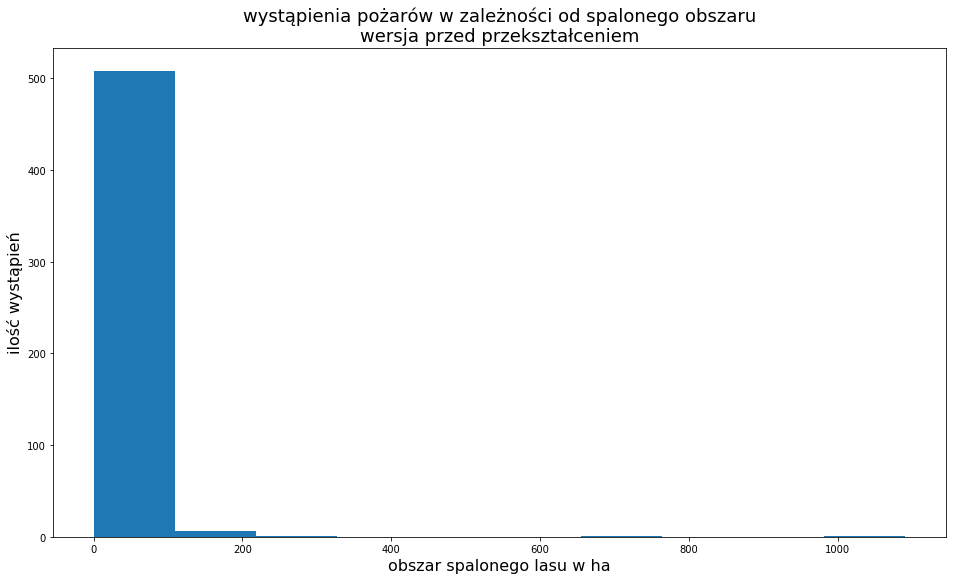

In [24]:
#wystąpienia pożaru w zależności od powierzchni

mpt.figure(figsize=(16, 9))
mpt.hist(data_set.loc[:, 'area'])
mpt.title("wystąpienia pożarów w zależności od spalonego obszaru\n"\
        "wersja przed przekształceniem", fontsize=18)
mpt.xlabel('obszar spalonego lasu w ha', fontsize = 16)
mpt.ylabel('ilość wystąpień',fontsize = 16)
mpt.show()

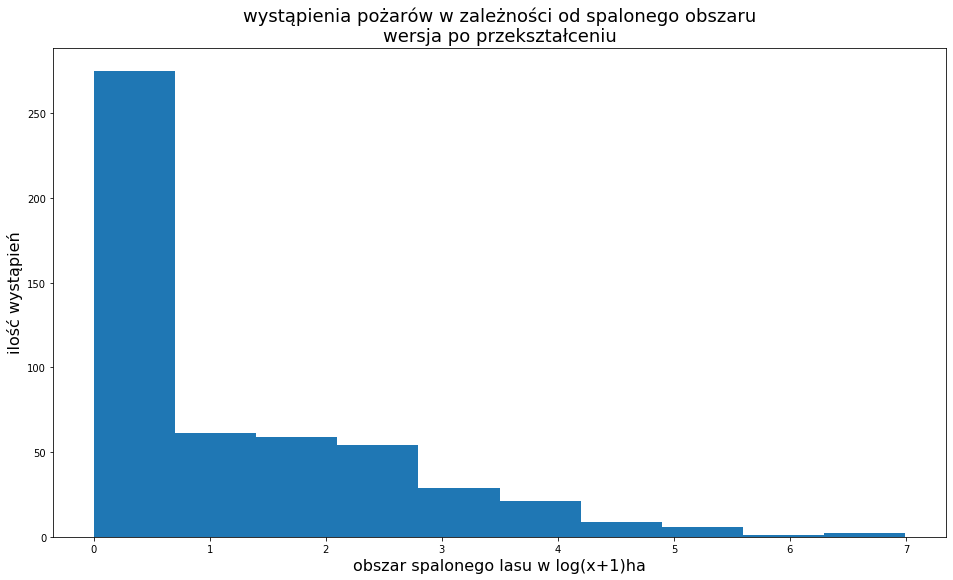

In [23]:
mpt.figure(figsize=(16,9))
mpt.hist(np.log(data_set.loc[:, 'area']+1))
mpt.title("wystąpienia pożarów w zależności od spalonego obszaru\n"\
        "wersja po przekształceniu", fontsize=18)
mpt.xlabel('obszar spalonego lasu w log(x+1)ha', fontsize = 16)
mpt.ylabel('ilość wystąpień',fontsize = 16)
mpt.show()

Można zauważyć, że reprezentacja danych po przekształceniu jest bardziej rozrzucona po histogramie, co pozwala przypuszczać, że właśnie ten sposób będzie dawał lepsze wyniki regresorów, tak jak to zostało zaznaczone na początku tego punktu. Aby sprawdzić, czy pozostałe cechy próbek zachowują się podobnie do tej przed chwilą sprawdzonej i aby zbadać ich wpływ na powstanie pożaru, wykonano histogram pozostałych 11 opisanych wcześniej wielkości. 


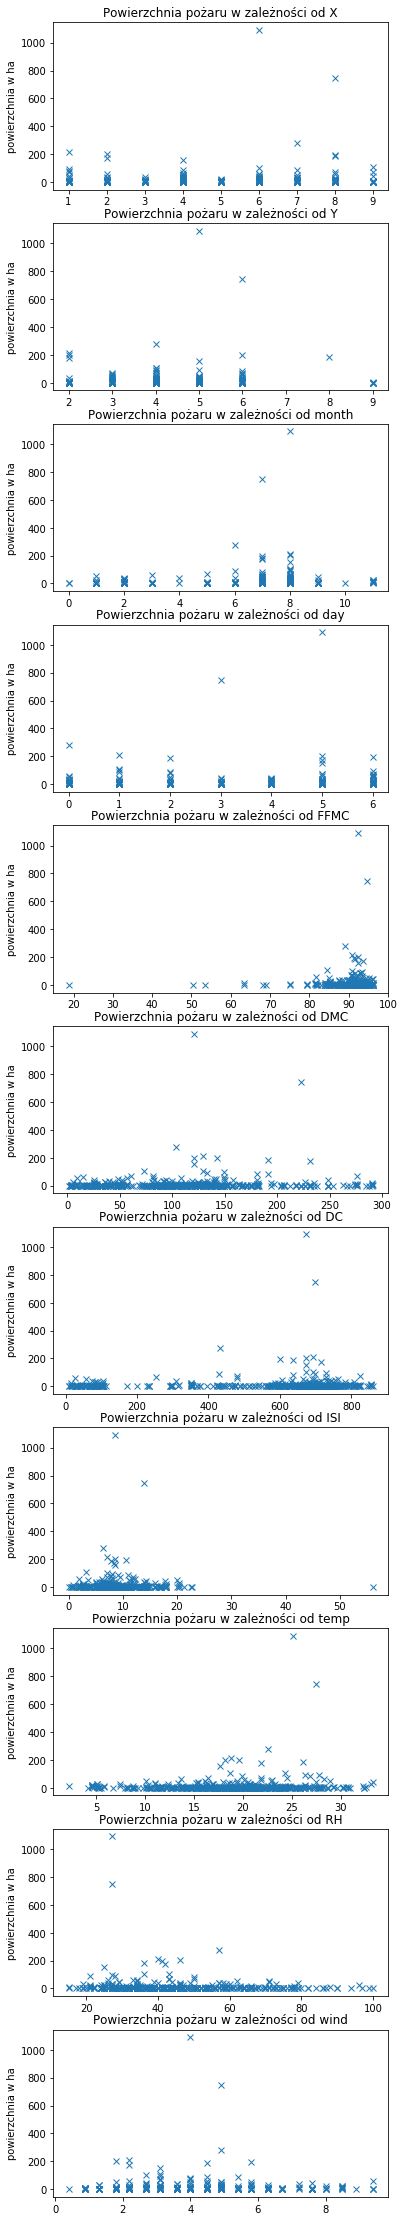

In [99]:
mpt.figure(figsize = (6,40))

for i in range(11):
    mpt.subplot(11, 1, i+1)
    mpt.ylabel('powierzchnia w ha')
    mpt.title("Powierzchnia pożaru w zależności od " +data_set.columns[i])
    mpt.plot(data_set.iloc[:, i], data_set.iloc[:, 12], 'x')

   W pozostałych przypadkach rozkład danych jest w miarę rozrzucony, więc nie ma potrzeby ich normalizowania. Można się również pokusić o próbę przewidzenia wyników regresorów, przykładowo prawdopodobna wydaje się hipoteza, że wybuch pożaru nie wynika z dnia tygodnia, za to miesiąc ma już pewne znaczenie, gdyż wyraźnie duża liczba pożarów następowała w sierpniu i wrześniu.Również prawie wszystkie pożary wybuchały gdy wskaźnik __FFMC__ miał wartość powyżej $80$. 

## Pierwszy regresor - drzewo decyzyjne

Pierwszym modelem, którym próbowaliśmy przewidzieć wystąpienie pożarów, był algorytm drzew decyzyjnych, wykorzystaliśmy do tego celu implementację z biblioteki _scikit-learn_. 

>Drzewa decyzyjne są metodą uczenia z nadzorem wykorzystywaną w celu klasyfikacji bądź regresji. W tym celu wykorzystywana jest metoda _if-then-else_.  

W celu poszukiwania najlepszych wyników postanowiliśmy trenować modele wykorzystując różną liczność cech, nie tylko wszystkie na raz. W dokumencie umieszczonym na stronie skąd pobieraliśmy dane kilkukrotnie wspomniano, że dla niektórych algorytmów najlepszy wynik dało wykorzystanie jedynie 4 konkretnych cech. Postanowiliśmy zweryfikować tą hipotezę również dla drzew decyzyjnych, a następnie przetestować inne liczności i zestawić ze sobą wyniki po walidacji. 

Walidacja odbywa się przez podzielenie zestawu danych na $10$ części, $9$ z nich służy jako zbiory uczące, a jeden jako zbiór testowy - taka iteracja jest powtarzana $10$ razy, a by każdy ze zbiorów mógł być zbiorem testowym. 

In [136]:
#import potrzebnych algorytmów do implementacji drzewa i walidacji wyników
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

# crossval = KFold(data_set.shape[0], n_folds=10, shuffle = True, random_state=1)
crossval_it = KFold(5, True,1)
data_set.iloc[:,0:11]
treeRegresor = tree.DecisionTreeRegressor(max_depth= 5)
treeRegresor.fit(data_set.iloc[:, 1:11], data_set.iloc[:, 12])
scores = cross_val_score(treeRegresor, data_set.iloc[:, 0:11], data_set.iloc[:, 12], scoring= 'neg_mean_squared_error', cv = crossval_it, n_jobs=1)

print("Folds: ",len(scores),", mean squared error: ",np.mean(np.abs(scores))," std: ",np.std(scores))

Folds:  5 , mean squared error:  6768.89339214114  std:  3542.306267702416


In [122]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])